Ujjwal Singh/ Feb-23 batch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import binom, geom, norm
from scipy.stats import ttest_1samp, ttest_ind
from scipy.stats import chi2, chi2_contingency, chisquare
from scipy.stats import f_oneway, kruskal, levene, shapiro
from scipy.stats import pearsonr, spearmanr
from statsmodels.graphics.gofplots import qqplot

In [2]:
aerofit= pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749.csv")

In [3]:
aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
aerofit.shape

(180, 9)

In [6]:
aerofit.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
# To get more clarity by seeing dataset, renaming of the column performs.
aerofit.rename({"Age":"Age(Yr)","Education":"Education(Yr)","Usage":"Usage(Avg No./week)","Income":"Income(Annual($))","Fitness":"Fitness(1(P)/5(E))","Miles":"Avg Mile/week"}, axis=1, inplace= True)

In [8]:
aerofit.head()

,Product,Age(Yr),Gender,Education(Yr),MaritalStatus,Usage(Avg No./week),Fitness(1(P)/5(E)),Income(Annual($)),Avg Mile/week
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [9]:
# Type of products and there counts
# arrange wrt unit price:- KP281 < KP481 < KP781
# arrange wrt count:- KP281 > KP481 > KP781
aerofit["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

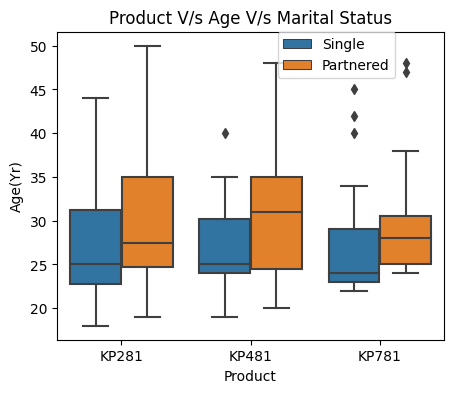

In [10]:
plt.figure(figsize=(5,4))
sns.boxplot(data= aerofit, x= "Product", y="Age(Yr)", hue="MaritalStatus")
plt.title("Product V/s Age V/s Marital Status", fontsize=12)
plt.legend(loc=(0.57,0.85))
plt.show()

In [11]:
aerofit.groupby(["Product"])["Age(Yr)"].aggregate(["mean","median"])
# Avg and median age of users wrt products

,mean,median
Product,,
KP281,28.55,26.0
KP481,28.90,26.0
KP781,29.10,27.0


In [12]:
# Avg and median age of users wrt products and Marital Status
aerofit.groupby(["Product","MaritalStatus"])["Age(Yr)"].aggregate(["mean","median"])

mean  median
Product MaritalStatus                   
KP281   Partnered      29.666667    27.5
        Single         26.875000    25.0
KP481   Partnered      30.222222    31.0
        Single         26.916667    25.0
KP781   Partnered      29.826087    28.0
        Single         28.117647    24.0

In [13]:
# Avg and median age of users wrt products and Gender
aerofit.groupby(["Product","Gender"])["Age(Yr)"].aggregate(["mean","median"])

mean  median
Product Gender                   
KP281   Female  28.450000    26.5
        Male    28.650000    26.0
KP481   Female  29.103448    29.0
        Male    28.709677    25.0
KP781   Female  27.000000    26.0
        Male    29.545455    27.0

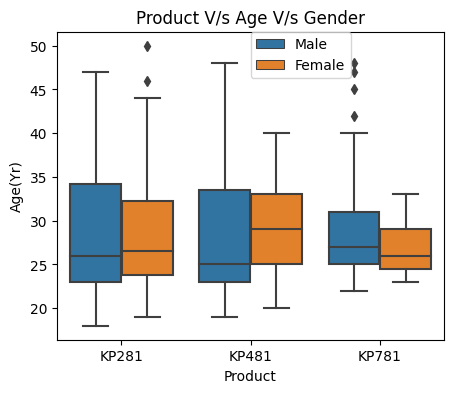

In [14]:
plt.figure(figsize=(5,4))
sns.boxplot(data= aerofit, x= "Product", y="Age(Yr)", hue="Gender")
plt.title("Product V/s Age V/s Gender", fontsize=12)
plt.legend(loc=(0.5,0.85))
plt.show()

In [15]:
aerofit.groupby(["Product"])["Education(Yr)"].aggregate(["mean","max","min"])
# mean education status of individuals are mainly about 15 yrs for KP281 and KP481 and 17 yrs for KP781

,mean,max,min
Product,,,
KP281,15.037500,18,12
KP481,15.116667,18,12
KP781,17.325000,21,14


In [16]:
aerofit.groupby(["Product"])["Usage(Avg No./week)"].aggregate(["mean","sum"])
# Wheather the number of users for KP281 is more KP781 has more weekly usage.

,mean,sum
Product,,
KP281,3.087500,247
KP481,3.066667,184
KP781,4.775000,191


In [17]:
aerofit.groupby(["Product"])["Usage(Avg No./week)"].aggregate(["mean", "sum"])

,mean,sum
Product,,
KP281,3.087500,247
KP481,3.066667,184
KP781,4.775000,191


Text(0.5, 1.0, 'Product V/s Avg weekly Usage')

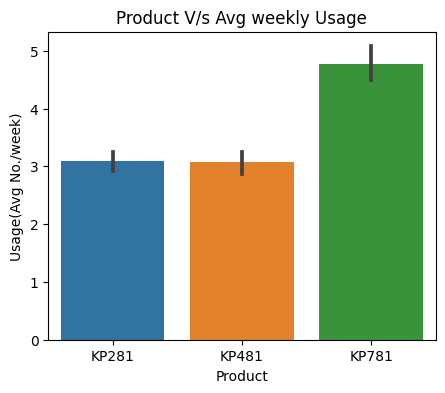

In [18]:
plt.figure(figsize=(5,4))
sns.barplot(x="Product", y="Usage(Avg No./week)", data= aerofit)
plt.title("Product V/s Avg weekly Usage", fontsize=12)

Text(0.5, 1.0, 'Product V/s Avg weekly Usage')

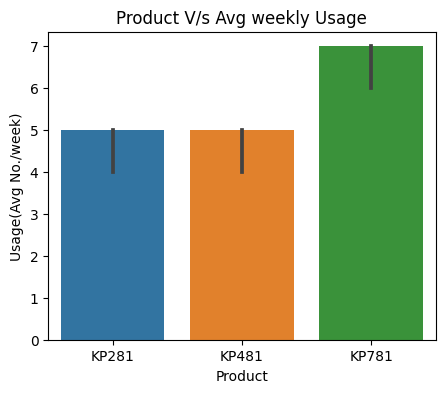

In [19]:
plt.figure(figsize=(5,4))
sns.barplot(x="Product", y="Usage(Avg No./week)", data= aerofit, estimator= np.max)
plt.title("Product V/s Avg weekly Usage", fontsize=12)

In [20]:
Rating= aerofit["Fitness(1(P)/5(E))"].value_counts()
labels= ["1","2","3","4","5"]

In [21]:
Rating

3    97
5    31
2    26
4    24
1     2
Name: Fitness(1(P)/5(E)), dtype: int64

<Axes: xlabel='Fitness(1(P)/5(E))', ylabel='count'>

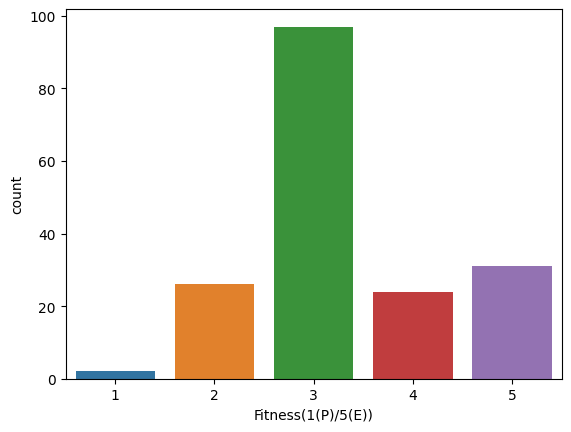

In [22]:
sns.countplot(data= aerofit, x=aerofit["Fitness(1(P)/5(E))"])

In [23]:
aerofit.groupby(["Product","Fitness(1(P)/5(E))"])["Fitness(1(P)/5(E))"].aggregate(["count"])

count
Product Fitness(1(P)/5(E))       
KP281   1                       1
        2                      14
        3                      54
        4                       9
        5                       2
KP481   1                       1
        2                      12
        3                      39
        4                       8
KP781   3                       4
        4                       7
        5                      29

<Axes: xlabel='Product', ylabel='count'>

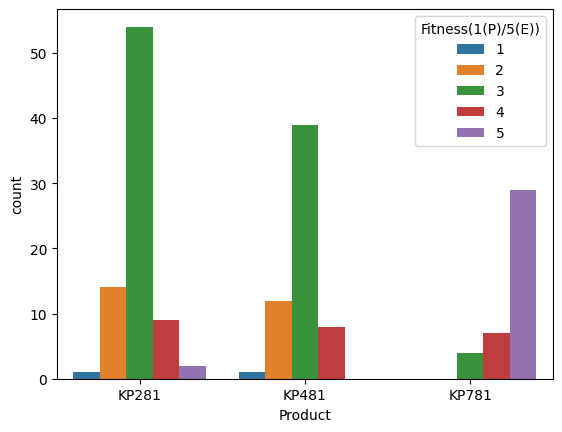

In [24]:
sns.countplot(data= aerofit, x="Product", hue="Fitness(1(P)/5(E))")
# that for sure KP781 is very quality product since it has max unit price.
# Other two types have maximum rating of 3 star.

In [25]:
aerofit.groupby(["Product"])[["Income(Annual($))"]].sum()
# total Annual income wrt product

,Income(Annual($))
Product,
KP281,3713442
KP481,2938419
KP781,3017663


Text(0.5, 1.0, 'Product V/s Income(Annual)')

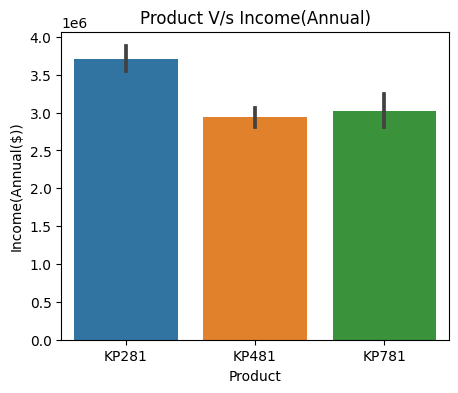

In [26]:
plt.figure(figsize=(5,4))
sns.barplot(x="Product", y="Income(Annual($))", data= aerofit, estimator= np.sum)
plt.title("Product V/s Income(Annual)", fontsize=12)

In [27]:
aerofit.groupby(["Product"])[["Income(Annual($))"]].max()
# Maximum income with the product

,Income(Annual($))
Product,
KP281,68220
KP481,67083
KP781,104581


Text(0.5, 1.0, 'Product V/s Income(Annual)')

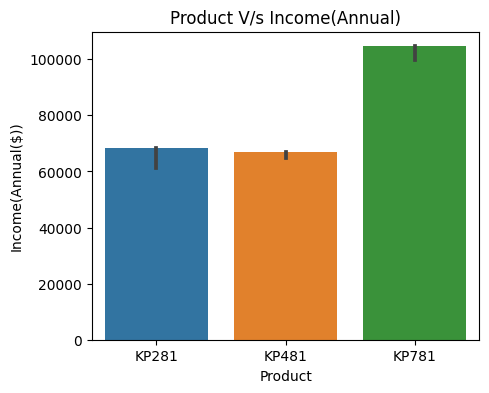

In [28]:
plt.figure(figsize=(5,4))
sns.barplot(x="Product", y="Income(Annual($))", data= aerofit, estimator= np.max)
plt.title("Product V/s Income(Annual)", fontsize=12)

(array([ 1.,  7., 16., 22., 13., 28., 27., 12., 12.,  7.,  3.,  4.,  5.,
         4.,  7.,  6.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.]),
 array([ 21. ,  32.3,  43.6,  54.9,  66.2,  77.5,  88.8, 100.1, 111.4,
        122.7, 134. , 145.3, 156.6, 167.9, 179.2, 190.5, 201.8, 213.1,
        224.4, 235.7, 247. , 258.3, 269.6, 280.9, 292.2, 303.5, 314.8,
        326.1, 337.4, 348.7, 360. ]),
 <BarContainer object of 30 artists>)

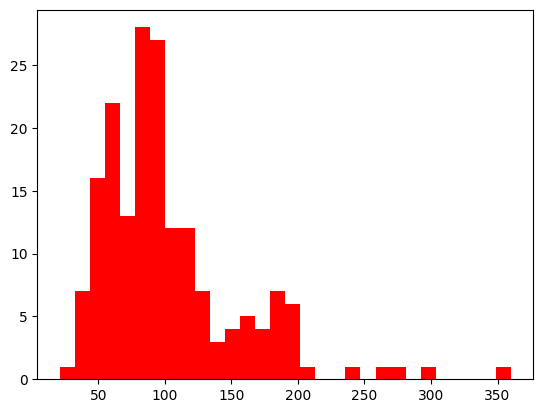

In [29]:
# For Avg mile per week wrt Product
plt.hist(aerofit["Avg Mile/week"], bins=30, color= "Red")

<Axes: xlabel='Avg Mile/week', ylabel='Density'>

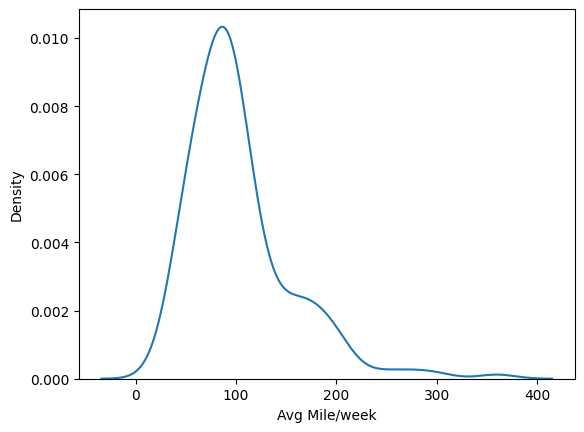

In [30]:
sns.kdeplot(aerofit["Avg Mile/week"])

<Axes: xlabel='Avg Mile/week', ylabel='Count'>

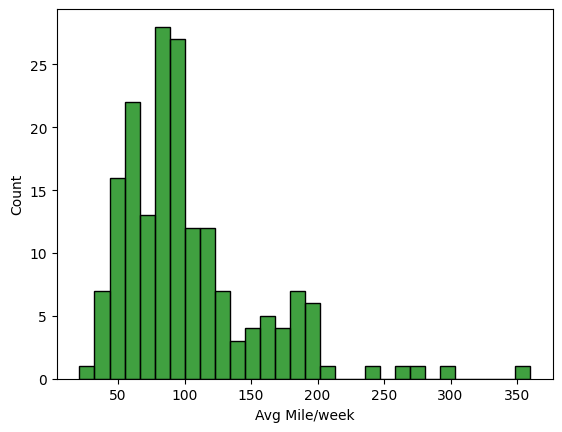

In [31]:
sns.histplot(aerofit["Avg Mile/week"], bins= 30, color= "green")

In [32]:
KP281= aerofit.loc[aerofit["Product"] == "KP281"]
KP481= aerofit.loc[aerofit["Product"] == "KP481"]
KP781= aerofit.loc[aerofit["Product"] == "KP781"]

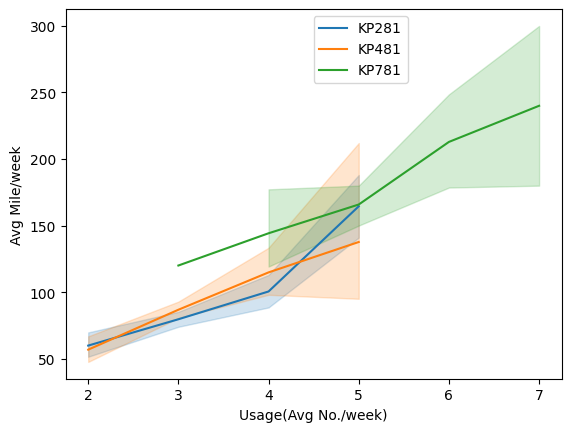

In [33]:
sns.lineplot(x= "Usage(Avg No./week)", y= "Avg Mile/week", data= KP281, label="KP281")
sns.lineplot(x= "Usage(Avg No./week)", y= "Avg Mile/week", data= KP481, label="KP481")
sns.lineplot(x= "Usage(Avg No./week)", y= "Avg Mile/week", data= KP781, label="KP781")
plt.legend(loc=(0.5,0.8))

In [34]:
# Check for the type of curve/ trend follows
Mean_age= aerofit["Age(Yr)"].mean().round(3)
std_age= aerofit["Age(Yr)"].std().round(3)
print(Mean_age, std_age)

28.789 6.943


<Axes: xlabel='Age(Yr)', ylabel='Count'>

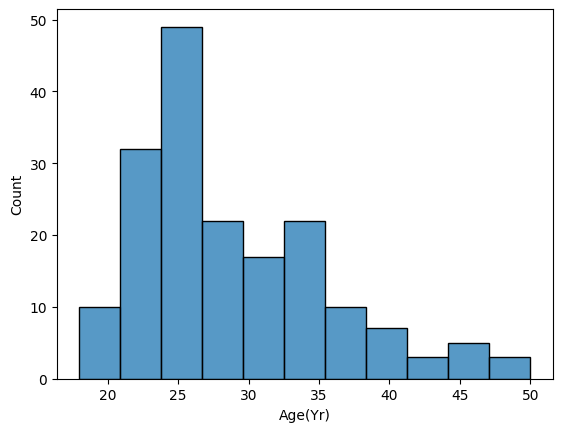

In [35]:
sns.histplot(aerofit["Age(Yr)"])

In [36]:
# Lets try bootstraping
bootstrap_mean_age= []
for reps in range(10000):
  bootstrap_sample= np.random.choice(aerofit["Age(Yr)"], size=180)
  bootstrap_sample_mean= np.mean(bootstrap_sample)
  bootstrap_mean_age.append(bootstrap_sample_mean)

<Axes: ylabel='Count'>

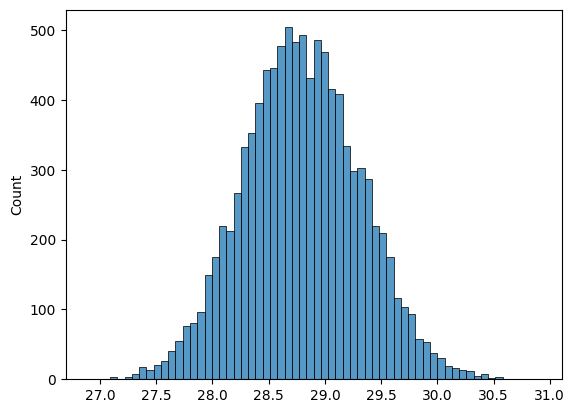

In [37]:
sns.histplot(bootstrap_mean_age)

In [38]:
Mean_age_2= np.mean(bootstrap_mean_age).round(3)
std_age_2= np.std(bootstrap_mean_age).round(3)
print(Mean_age_2, std_age_2)

28.794 0.519


In [39]:
# what is 95% CI value of Age
Age_1= np.percentile(bootstrap_mean_age, 2.5).round(3)
Age_2= np.percentile(bootstrap_mean_age, 97.5).round(3)
print(Age_1, Age_2)

27.789 29.817


This range seems to be not correct bcoz of very low range of age variation in 95% occupancy.

In [40]:
Age_L= norm.ppf(0.025)*std_age + Mean_age
Age_H= norm.ppf(0.975)*std_age + Mean_age
print(Age_L.round(3), Age_H.round(3))
# This seems justified range for the age variations.

15.181 42.397


<Axes: xlabel='Age(Yr)', ylabel='count'>

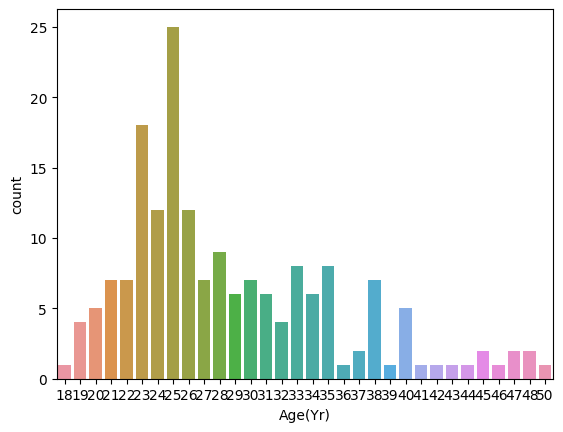

In [41]:
sns.countplot(x= "Age(Yr)", data= aerofit)

In [42]:
pd.crosstab(aerofit["Product"], aerofit["Gender"]) # frequency

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


In [43]:
pd.crosstab(aerofit["Product"], aerofit["Gender"], margins= True)
# It gives idea of number of occurances

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [66]:
pd.crosstab(index= aerofit["Product"], columns= aerofit["Gender"], normalize= True, margins= True)
'''
if we want to perform row wise/ column wise percentaging than use:
pd.crosstab(index= aerofit["Product"], columns= aerofit["Gender"], normalize= "index", margins= True) and
pd.crosstab(index= aerofit["Product"], columns= aerofit["Gender"], normalize= "columns", margins= True)
This referes to the:
normalize = columns matlab -> columns is given in conditional probability and column wise total will be 100%.
normalize = index matlab -> rows is given in CP and row ki entries will become 100%.
'''

Gender,Female,Male,All
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
All,0.422222,0.577778,1.000000


22.2% is the joint P of getting KP281 and Female.  
18.3% is the joint P of getting KP781 and Male.  
33.33% is the marginal P of getting KP481.  
9.2 % is the conditional p of getting KP781 if Female is given (below cell).

In [64]:
pd.crosstab(index= aerofit["Product"], columns= aerofit["Gender"], normalize= "columns", margins= True)

Gender,Female,Male,All
Product,,,
KP281,0.526316,0.384615,0.444444
KP481,0.381579,0.298077,0.333333
KP781,0.092105,0.317308,0.222222


In [58]:
pd.crosstab(index= aerofit["Product"], columns= [aerofit["MaritalStatus"],aerofit["Gender"]], normalize= True, margins= True)

MaritalStatus Partnered              Single                 All
Gender           Female      Male    Female      Male          
Product                                                        
KP281          0.150000  0.116667  0.072222  0.105556  0.444444
KP481          0.083333  0.116667  0.077778  0.055556  0.333333
KP781          0.022222  0.105556  0.016667  0.077778  0.222222
All            0.255556  0.338889  0.166667  0.238889  1.000000

In [63]:
pd.crosstab(index= aerofit["Product"], columns= [aerofit["MaritalStatus"],aerofit["Gender"]], normalize= "index", margins= True)

MaritalStatus Partnered              Single          
Gender           Female      Male    Female      Male
Product                                              
KP281          0.337500  0.262500  0.162500  0.237500
KP481          0.250000  0.350000  0.233333  0.166667
KP781          0.100000  0.475000  0.075000  0.350000
All            0.255556  0.338889  0.166667  0.238889

In [57]:
pd.crosstab(index= aerofit["Gender"], columns= aerofit["Product"], normalize= True, margins= True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
All,0.444444,0.333333,0.222222,1.000000


In [46]:
pd.crosstab(aerofit["Product"], [aerofit["MaritalStatus"],aerofit["Gender"]], values= aerofit["Age(Yr)"], aggfunc= np.min)

MaritalStatus Partnered      Single     
Gender           Female Male Female Male
Product                                 
KP281                19   20     22   18
KP481                20   21     23   19
KP781                25   24     23   22

In [47]:
pd.crosstab(aerofit["Product"], [aerofit["MaritalStatus"],aerofit["Gender"]], values= aerofit["Age(Yr)"], aggfunc= np.max)

MaritalStatus Partnered      Single     
Gender           Female Male Female Male
Product                                 
KP281                50   47     44   38
KP481                40   48     40   34
KP781                33   48     26   45

In [48]:
pd.crosstab(aerofit["Product"], [aerofit["Gender"]], values= aerofit["Age(Yr)"], aggfunc= np.average)

Gender,Female,Male
Product,,
KP281,28.450000,28.650000
KP481,29.103448,28.709677
KP781,27.000000,29.545455


In [49]:
pd.crosstab(aerofit["Product"], [aerofit["Gender"]], values= aerofit["Education(Yr)"], aggfunc= np.max)

Gender,Female,Male
Product,,
KP281,18,18
KP481,18,16
KP781,21,21


In [50]:
pd.crosstab(aerofit["Product"], [aerofit["Gender"]], values= aerofit["Education(Yr)"], aggfunc= np.min)

Gender,Female,Male
Product,,
KP281,14,12
KP481,13,12
KP781,16,14


In [51]:
pd.crosstab(aerofit["Product"], [aerofit["Gender"]], values= aerofit["Income(Annual($))"], aggfunc= np.min)

Gender,Female,Male
Product,,
KP281,30699,29562
KP481,34110,31836
KP781,52291,48556


In [52]:
pd.crosstab(aerofit["Product"], [aerofit["Gender"]], values= aerofit["Income(Annual($))"], aggfunc= np.max)

Gender,Female,Male
Product,,
KP281,67083,68220
KP481,65220,67083
KP781,95866,104581


In [53]:
pd.crosstab(aerofit["Product"], [aerofit["Gender"]], values= aerofit["Income(Annual($))"], aggfunc= np.average)

Gender,Female,Male
Product,,
KP281,46020.075000,46815.975000
KP481,49336.448276,48634.258065
KP781,73633.857143,75825.030303


In [67]:
pd.crosstab(index= aerofit["Fitness(1(P)/5(E))"], columns= aerofit["Product"], normalize= True, margins= True)
# normalize= True me aapko dono last row and last column ke saamne sum millega, bcoz of marginal and Joint Probability.
# TO make sample space (denominator) constant.

Product,KP281,KP481,KP781,All
Fitness(1(P)/5(E)),,,,
1,0.005556,0.005556,0.000000,0.011111
2,0.077778,0.066667,0.000000,0.144444
3,0.300000,0.216667,0.022222,0.538889
4,0.050000,0.044444,0.038889,0.133333
5,0.011111,0.000000,0.161111,0.172222
All,0.444444,0.333333,0.222222,1.000000


<ipython-input-69-18d5f7006a3a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(aerofit.corr())


<Axes: >

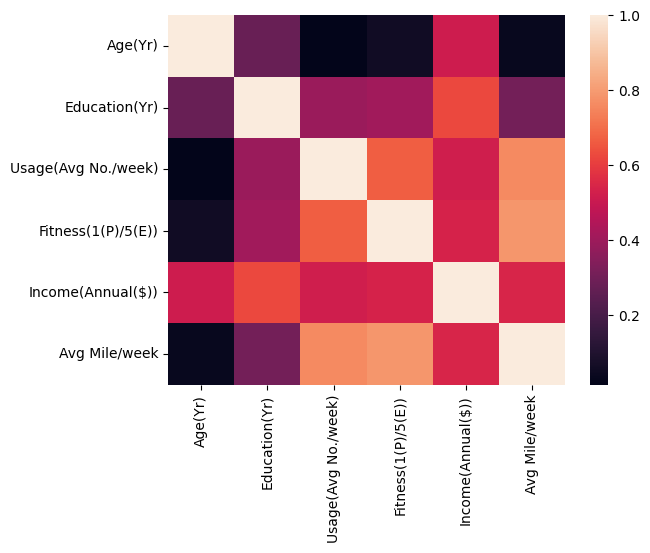

In [69]:
sns.heatmap(aerofit.corr())

<ipython-input-72-e1178ff34dc5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(aerofit.corr(), annot= True, cmap= "Reds")


<Axes: >

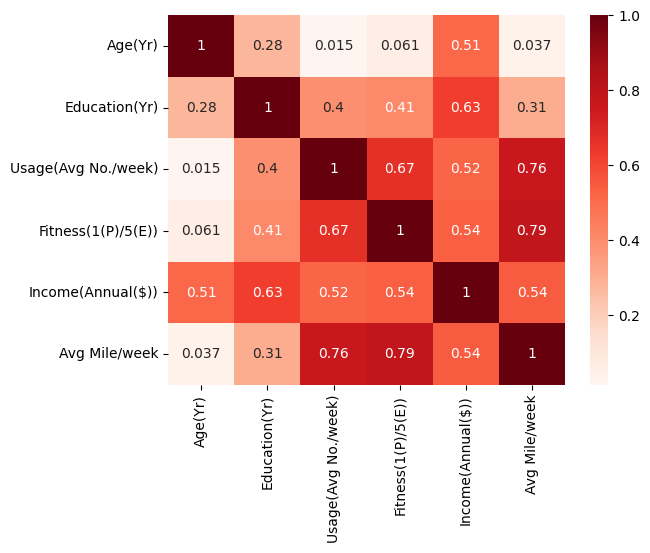

In [72]:
sns.heatmap(aerofit.corr(), annot= True, cmap= "Reds")

<ipython-input-75-c074f5bff209>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(aerofit_dummy.corr(), annot= True, cmap= "bone")


<Axes: >

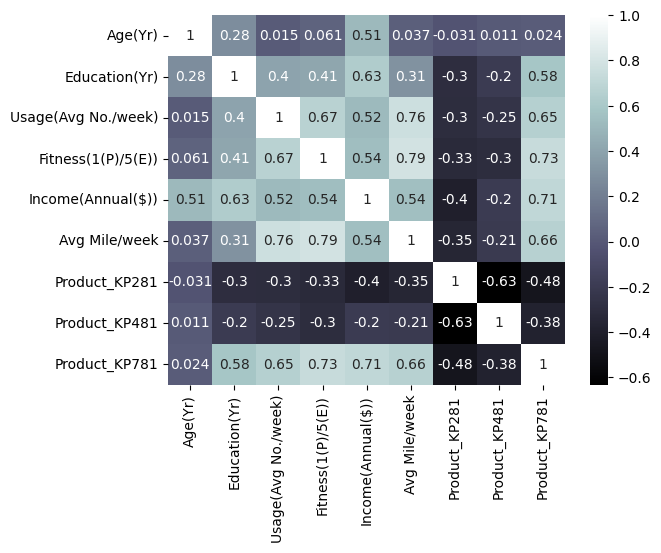

In [75]:
aerofit_dummy= pd.get_dummies(aerofit, columns=["Product"])
sns.heatmap(aerofit_dummy.corr(), annot= True, cmap= "bone")

In [79]:
aerofit_dummy.head()

,Age(Yr),Gender,Education(Yr),MaritalStatus,Usage(Avg No./week),Fitness(1(P)/5(E)),Income(Annual($)),Avg Mile/week,Product_KP281,Product_KP481,Product_KP781
0,18,Male,14,Single,3,4,29562,112,1,0,0
1,19,Male,15,Single,2,3,31836,75,1,0,0
2,19,Female,14,Partnered,4,3,30699,66,1,0,0
3,19,Male,12,Single,3,3,32973,85,1,0,0
4,20,Male,13,Partnered,4,2,35247,47,1,0,0


In [78]:
aerofit.head()

,Product,Age(Yr),Gender,Education(Yr),MaritalStatus,Usage(Avg No./week),Fitness(1(P)/5(E)),Income(Annual($)),Avg Mile/week
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
